### 1. Uploading data
The code requires command ``akdensity`` to be installed. 
Type ``ssc install akdensity`` if it is not installed yet.

In [1]:
use "https://github.com/worldbank/Stata-IE-Visual-Library/raw/develop/Library/Density%20plots/Shaded%20k-density%20functions/data.dta", clear

### 2. Create variables for the graph

In [2]:
sort beta_
gen rank = _n

### 3. Calculate parameters for graph

In [3]:
qui egen p98=pctile(beta_), p(98)

qui sum beta_, det
local mean = round(`r(mean)', .00001)
local median = round(`r(p50)', .00001)

### 4. Creating the graph

In [4]:
akdensity0 beta_, gen(x) at(beta_) bwidth(.0005) //akdensity0 comes from the user-written package "akdensity"

qui sum beta_, d

In [ ]:
twoway area x beta_ if rank>15 & beta_<(`r(p10)'), color(gs14) || ///   
	area x beta_ if beta_>`r(p90)' & rank<980, color(gs14) || ///      
	area x beta_ if rank>15 & beta_<(`r(p5)'), color(gs9) || ///    
	area x beta_ if beta_>`r(p95)' & rank<980, color(gs9) || ///    
	line x beta_ if rank>15  & rank<980, lcolor(black) || ///    
	(pcarrowi -20 .00299 310 .00299, lcolor(cranberry) lpattern(dash) msize(zero)) || ///    
	(pcarrowi -20 `r(mean)' 310 `r(mean)', lcolor(gs7) lpattern(dash) msize(zero)) || ///    
	(pcarrowi -20 `r(p50)' 310 `r(p50)', lcolor(gs7) lpattern(dash) msize(zero)), /// 
	legend(off) ///
	xtitle("2SLS Coefficient from baseline model" " ") ///
	ytitle("Density" " ") ///
	xlabel(0 "0" .00299 "NQ=.00299" `r(p50)' "Median=`median'" `r(mean)' "Mean=`mean'" .015 ".02", angle(45)) ///
	ylabel(none) ///
	bgcolor(white) graphregion(color(white))

### 5. Exporting the graph


> (gs7) lpattern(dash) msize(zero)),  legend(off)  xtitle("2SLS Coefficient from baseline model" " ")  ytitle("Density" " ")  xlabel(0 "0" .00299 "NQ=.00299" `r(p50)' "Median=`median'" `r(mean)' "Mean=`mean'" .015 ".02", angle(45))  ylabel(none)  bgcolor(
> white) graphregion(color(white))

. noi gr export C:/Users/Saori/.stata_kernel_cache/graph${stata_kernel_graph_counter}.png, width(600) replace        


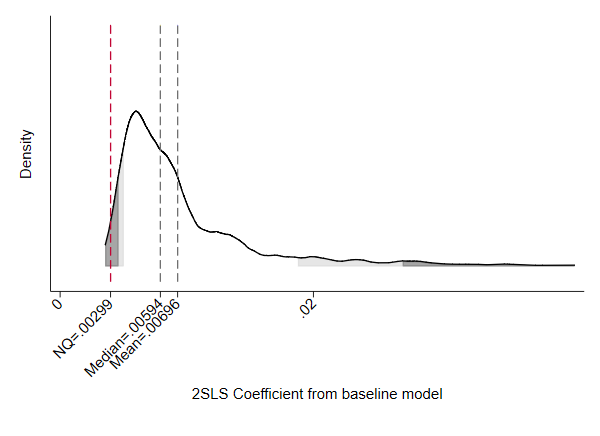



. global stata_kernel_graph_counter = $stata_kernel_graph_counter + 1        

. `5a6d50033241a343dc684724381211ea'



In [6]:
qui graph export "figure.png", as(png) replace